## K-Means Clustering

**Overview**<br>
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and reco

# 1. Read and visualise the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [5]:
# read the dataset
retail_df = pd.read_excel("India_Linkage.xlsx")
                        # , sep=",", encoding="ISO-8859-1", header=0)
retail_df.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [6]:
# basics of the df
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area Name                    35 non-null     object 
 1   Illiterate                   35 non-null     int64  
 2   Graduate & above             35 non-null     int64  
 3   Total - Population           35 non-null     int64  
 4   Percentage Illiterate        35 non-null     float64
 5   Percentage Graduate & above  35 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ KB


# 2. Clean the data

In [7]:
retail_df.isnull()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [8]:
retail_df.isnull().sum()

Area Name                      0
Illiterate                     0
Graduate & above               0
Total - Population             0
Percentage Illiterate          0
Percentage Graduate & above    0
dtype: int64

In [9]:
# missing values
round(100*(retail_df.isnull().sum())/len(retail_df), 2)

Area Name                      0.0
Illiterate                     0.0
Graduate & above               0.0
Total - Population             0.0
Percentage Illiterate          0.0
Percentage Graduate & above    0.0
dtype: float64

In [10]:
# drop all rows having missing values
retail_df = retail_df.dropna()
retail_df.shape

(35, 6)

In [11]:
retail_df.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [12]:
encoded = pd.get_dummies(retail_df, columns=['Area Name'])

In [13]:
encoded.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above,Area Name_State - ANDAMAN & NICOBAR ISLANDS,Area Name_State - ANDHRA PRADESH,Area Name_State - ARUNACHAL PRADESH,Area Name_State - ASSAM,Area Name_State - BIHAR,...,Area Name_State - ODISHA,Area Name_State - PUDUCHERRY,Area Name_State - PUNJAB,Area Name_State - RAJASTHAN,Area Name_State - SIKKIM,Area Name_State - TAMIL NADU,Area Name_State - TRIPURA,Area Name_State - UTTAR PRADESH,Area Name_State - UTTARAKHAND,Area Name_State - WEST BENGAL
0,3378518,385463,12541302,26.939133,3.073549,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,963742,267936,6864602,14.039299,3.903154,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4886265,979525,27743338,17.612390,3.530667,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,175200,91276,1055450,16.599555,8.648065,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1929236,525301,10086292,19.127307,5.208069,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [15]:
# 2. rescaling
X = encoded[['Illiterate', 'Graduate & above', 'Total - Population','Percentage Illiterate','Percentage Graduate & above']]

# instantiate
scaler = StandardScaler()

# fit_transform
X_scaled = scaler.fit_transform(X)
X_scaled

kmeans = KMeans(n_clusters=2, random_state=100)
kmeans.fit(X_scaled)

encoded["Cluster"] = kmeans.labels_

print(encoded)


    Illiterate  Graduate & above  Total - Population  Percentage Illiterate  \
0      3378518            385463            12541302              26.939133   
1       963742            267936             6864602              14.039299   
2      4886265            979525            27743338              17.612390   
3       175200             91276             1055450              16.599555   
4      1929236            525301            10086292              19.127307   
5      5055536           1130659            25351462              19.941793   
6      2801081           1360909            16787941              16.685078   
7     18451857           1830905            68548437              26.917984   
8     54225755           5741485           199812341              27.138341   
9     34832047           1514153           104099452              33.460356   
10       92891             21156              610577              15.213642   
11      406474             32355             1383727

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:


# Select numeric features for clustering
X = df[["Illiterate", "Graduate", "TotalPopulation", "PercIlliterate", "PercGraduate"]]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run KMeans
kmeans = KMeans(n_clusters=2, random_state=100)  # choose n_clusters as needed
kmeans.fit(X_scaled)

# Add cluster labels to dataframe
df["Cluster"] = kmeans.labels_

print(df)


# 4. Modelling

In [32]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(X_scaled)

KMeans(max_iter=50, n_clusters=3)

In [33]:
kmeans.labels_

array([1, 2, 0, ..., 1, 0, 0])

In [34]:
# help(KMeans)

## Finding the Optimal Number of Clusters

### SSD

In [16]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
ssd


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[121.22655008245195,
 90.32928566267867,
 57.42228268739984,
 45.227041356444126,
 40.81579512485591,
 28.6016690724569,
 23.598647598548556]

In [36]:
[7661.7058693207455,
 4433.747689347625,
 3360.3727308247912,
 2803.0203626192397,
 2392.2969604011073,
 2038.5395427454039,
 1907.2009671332921]

[7661.7058693207455,
 4433.747689347625,
 3360.3727308247912,
 2803.0203626192397,
 2392.2969604011073,
 2038.5395427454039,
 1907.2009671332921]

In [17]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
ssd


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[105.64726443042562,
 78.42990160872344,
 57.604390937949034,
 49.53287675983427,
 39.60795837322736,
 24.775438492368302,
 23.23576171321475]

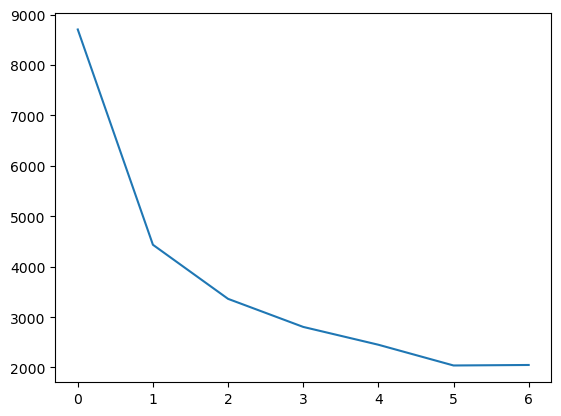

In [38]:
plt.plot(ssd)

## Hierarchical Clustering

In [22]:
encoded.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above,Area Name_State - ANDAMAN & NICOBAR ISLANDS,Area Name_State - ANDHRA PRADESH,Area Name_State - ARUNACHAL PRADESH,Area Name_State - ASSAM,Area Name_State - BIHAR,...,Area Name_State - PUDUCHERRY,Area Name_State - PUNJAB,Area Name_State - RAJASTHAN,Area Name_State - SIKKIM,Area Name_State - TAMIL NADU,Area Name_State - TRIPURA,Area Name_State - UTTAR PRADESH,Area Name_State - UTTARAKHAND,Area Name_State - WEST BENGAL,Cluster
0,3378518,385463,12541302,26.939133,3.073549,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,963742,267936,6864602,14.039299,3.903154,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2,4886265,979525,27743338,17.612390,3.530667,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,0
3,175200,91276,1055450,16.599555,8.648065,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,1929236,525301,10086292,19.127307,5.208069,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0


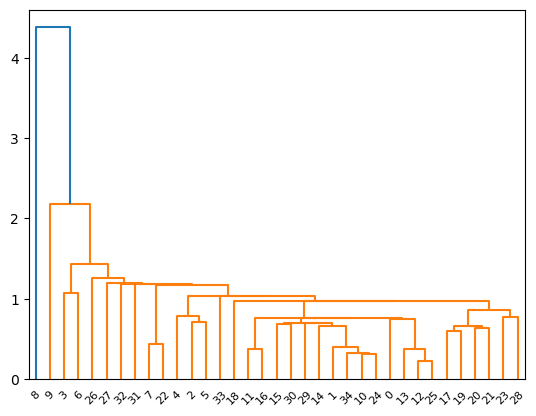

In [23]:
# single linkage
mergings = linkage(X_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

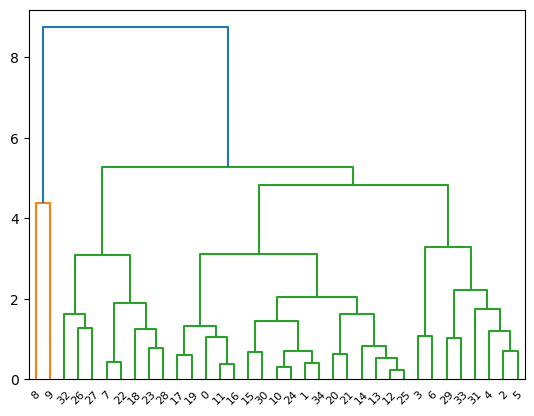

In [24]:
# complete linkage
mergings = linkage(X_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

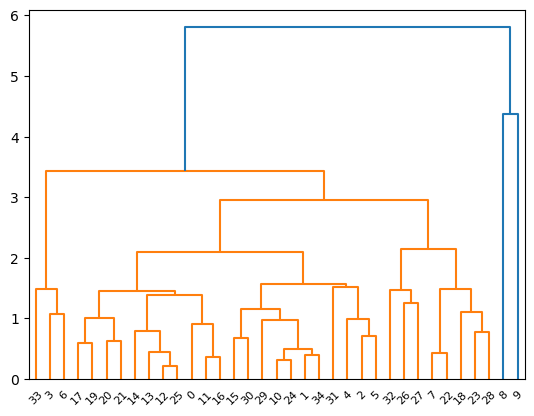

In [25]:
mergings = linkage(X_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()